#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")

##  <mark><span  style= "font-family: Times New Roman">Data loading</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [2]:
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
                'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target']

In [6]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
data.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64

##  <mark><span  style= "font-family: Times New Roman">Exploratory data analysis</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [8]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


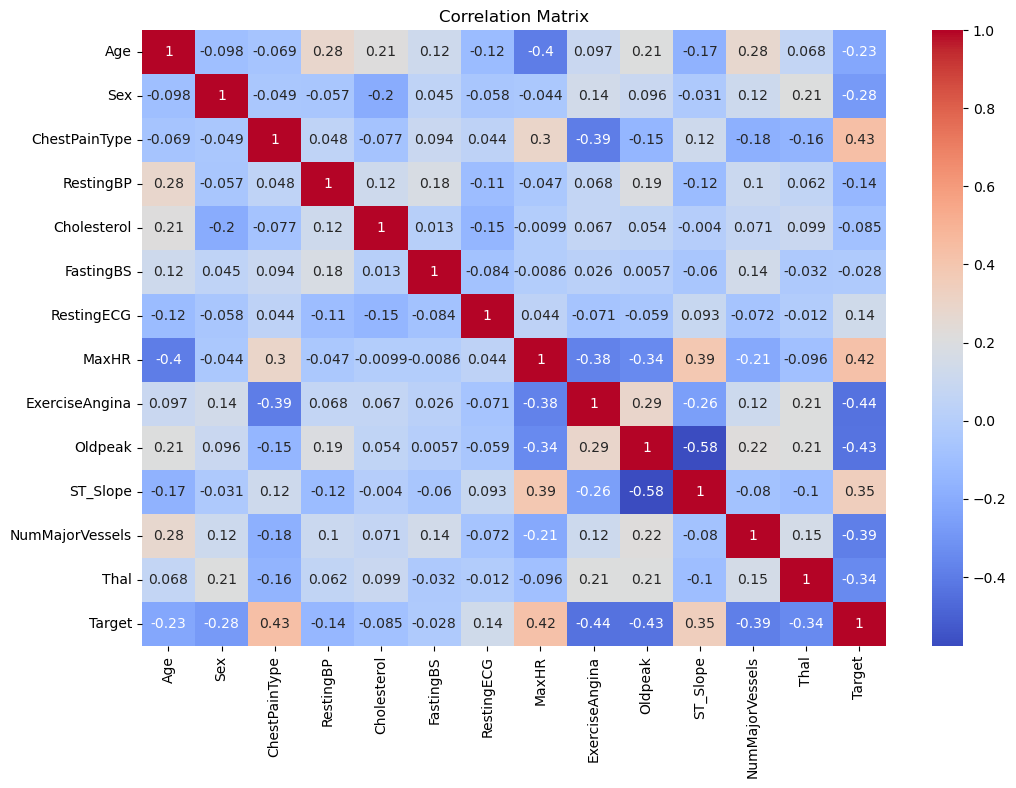

In [11]:
# Heatmap to check correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

We do not observe any multicolinearity in the features.

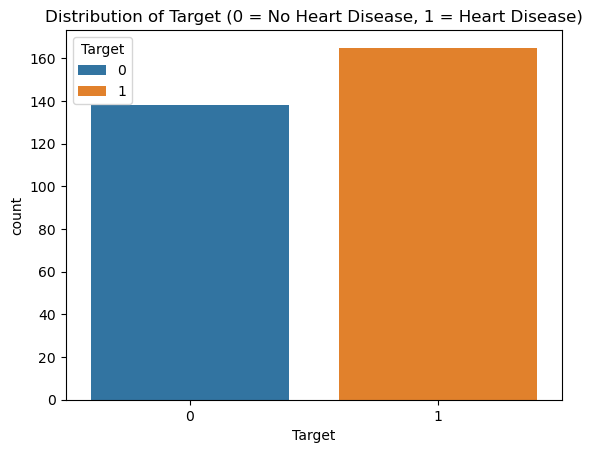

In [12]:
# Plotting Target variable distribution
sns.countplot(x='Target',data=data, hue='Target')
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

In [13]:
print("Patience without heart problems: ", len(data[data.Target == 0]))
print("Patience with heart problems: ", len(data[data.Target == 1]))

Patience without heart problems:  138
Patience with heart problems:  165


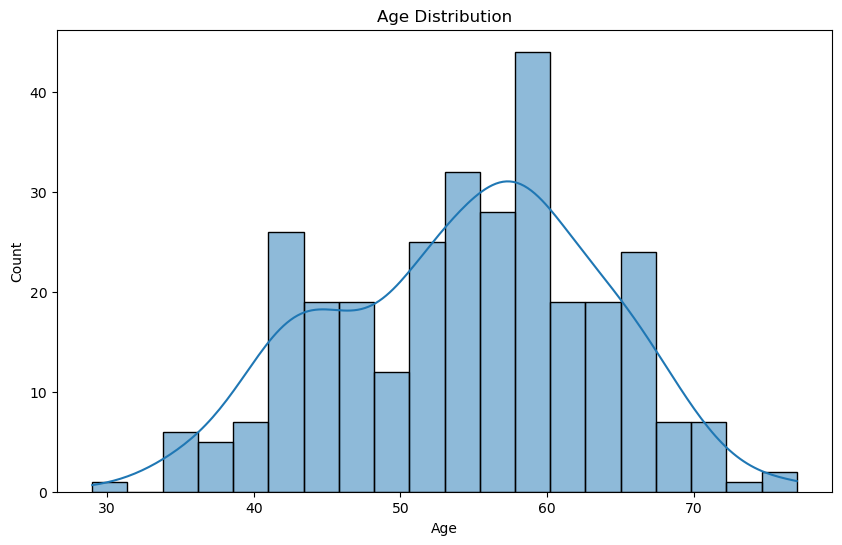

In [14]:
# Plot distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Here we see people in the age group of 50-60 have have more heart problems.

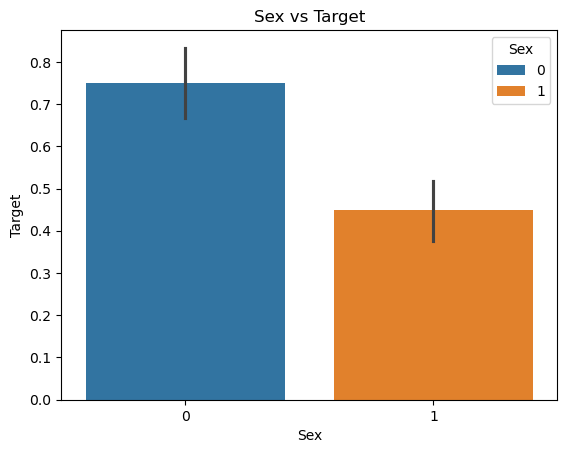

In [15]:
# Analyzing Target variable according to Sex
y = data['Target']
sns.barplot(x=data["Sex"],y=y, hue=data["Sex"])
plt.title('Sex vs Target')
plt.show()

It seems heart problems occur more in female compared to male.

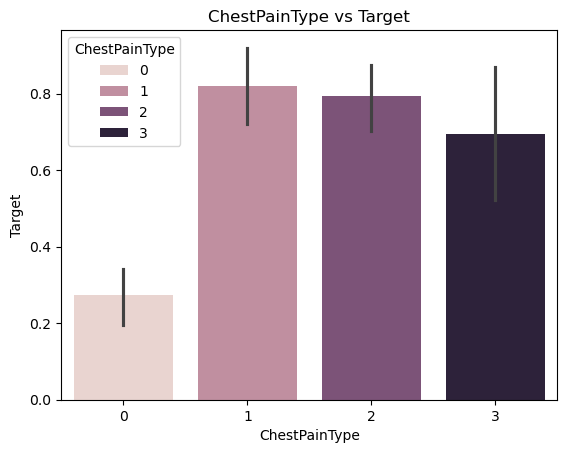

In [17]:
# Analyzing Target variable according to ChestPainType
sns.barplot(x=data["ChestPainType"],y=y, hue=data["ChestPainType"])
plt.title('ChestPainType vs Target')
plt.show()

Here we can see heart problems occur less in people with type'0' chest pain.

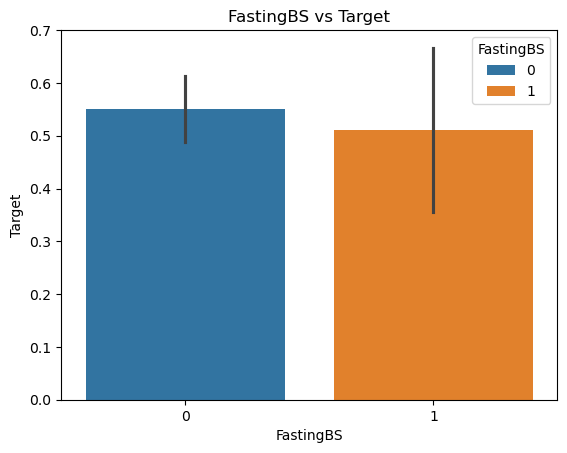

In [18]:
# Analyzing Target variable according to FastingBS
sns.barplot(x=data["FastingBS"],y=y, hue=data["FastingBS"])
plt.title('FastingBS vs Target')
plt.show()

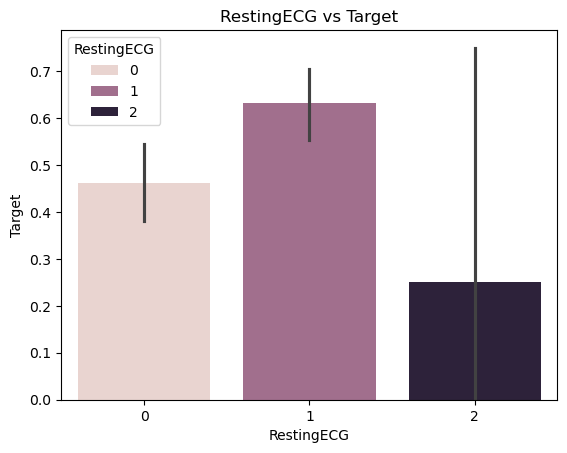

In [19]:
# Analyzing Target variable according to RestingECG
sns.barplot(x=data["RestingECG"],y=y, hue=data["RestingECG"])
plt.title('RestingECG vs Target')
plt.show()

We realize that people with restecg '1' and '0' are much more likely to have a heart problem than with restecg '2'

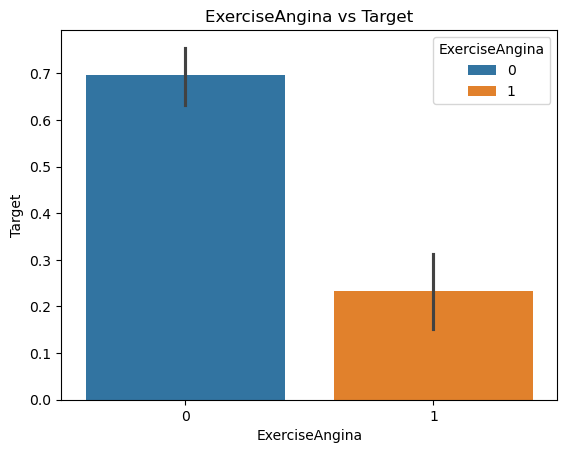

In [20]:
# Analyzing Target variable according to ExcerciseAngina
sns.barplot(x=data["ExerciseAngina"],y=y, hue=data["ExerciseAngina"])
plt.title('ExerciseAngina vs Target')
plt.show()

People who exercise are less likely to have heart problems.

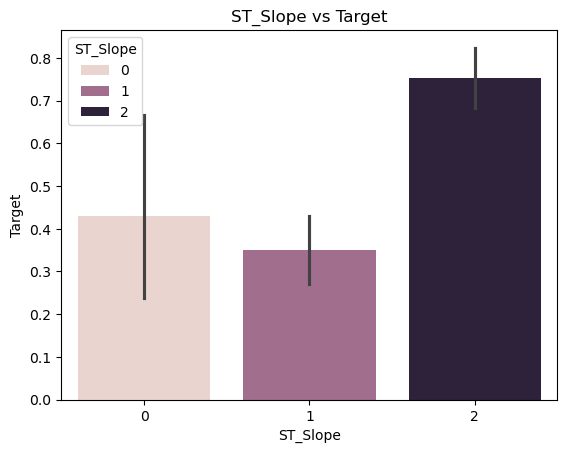

In [21]:
# Analyzing Target variable according to ST_Slope
sns.barplot(x=data["ST_Slope"],y=y, hue=data["ST_Slope"])
plt.title('ST_Slope vs Target')
plt.show()

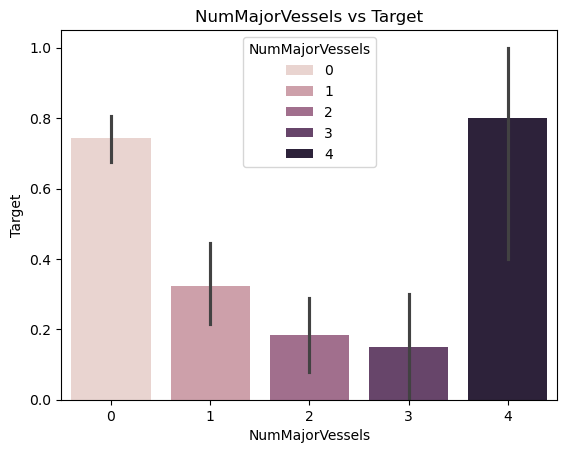

In [22]:
# Analyzing Target variable according to NumMajorVessels
sns.barplot(x=data["NumMajorVessels"],y=y, hue=data["NumMajorVessels"])
plt.title('NumMajorVessels vs Target')
plt.show()

NumMajorVessels=4 has astonishingly large number of heart patients.

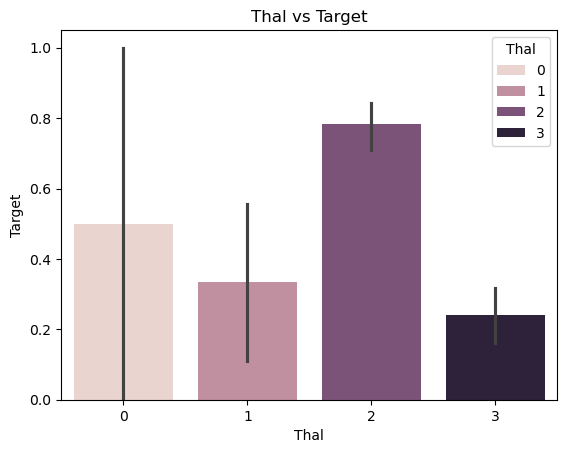

In [23]:
# Analyzing Target variable according to NumMajorVessels
sns.barplot(x=data["Thal"],y=y, hue=data["Thal"])
plt.title('Thal vs Target')
plt.show()

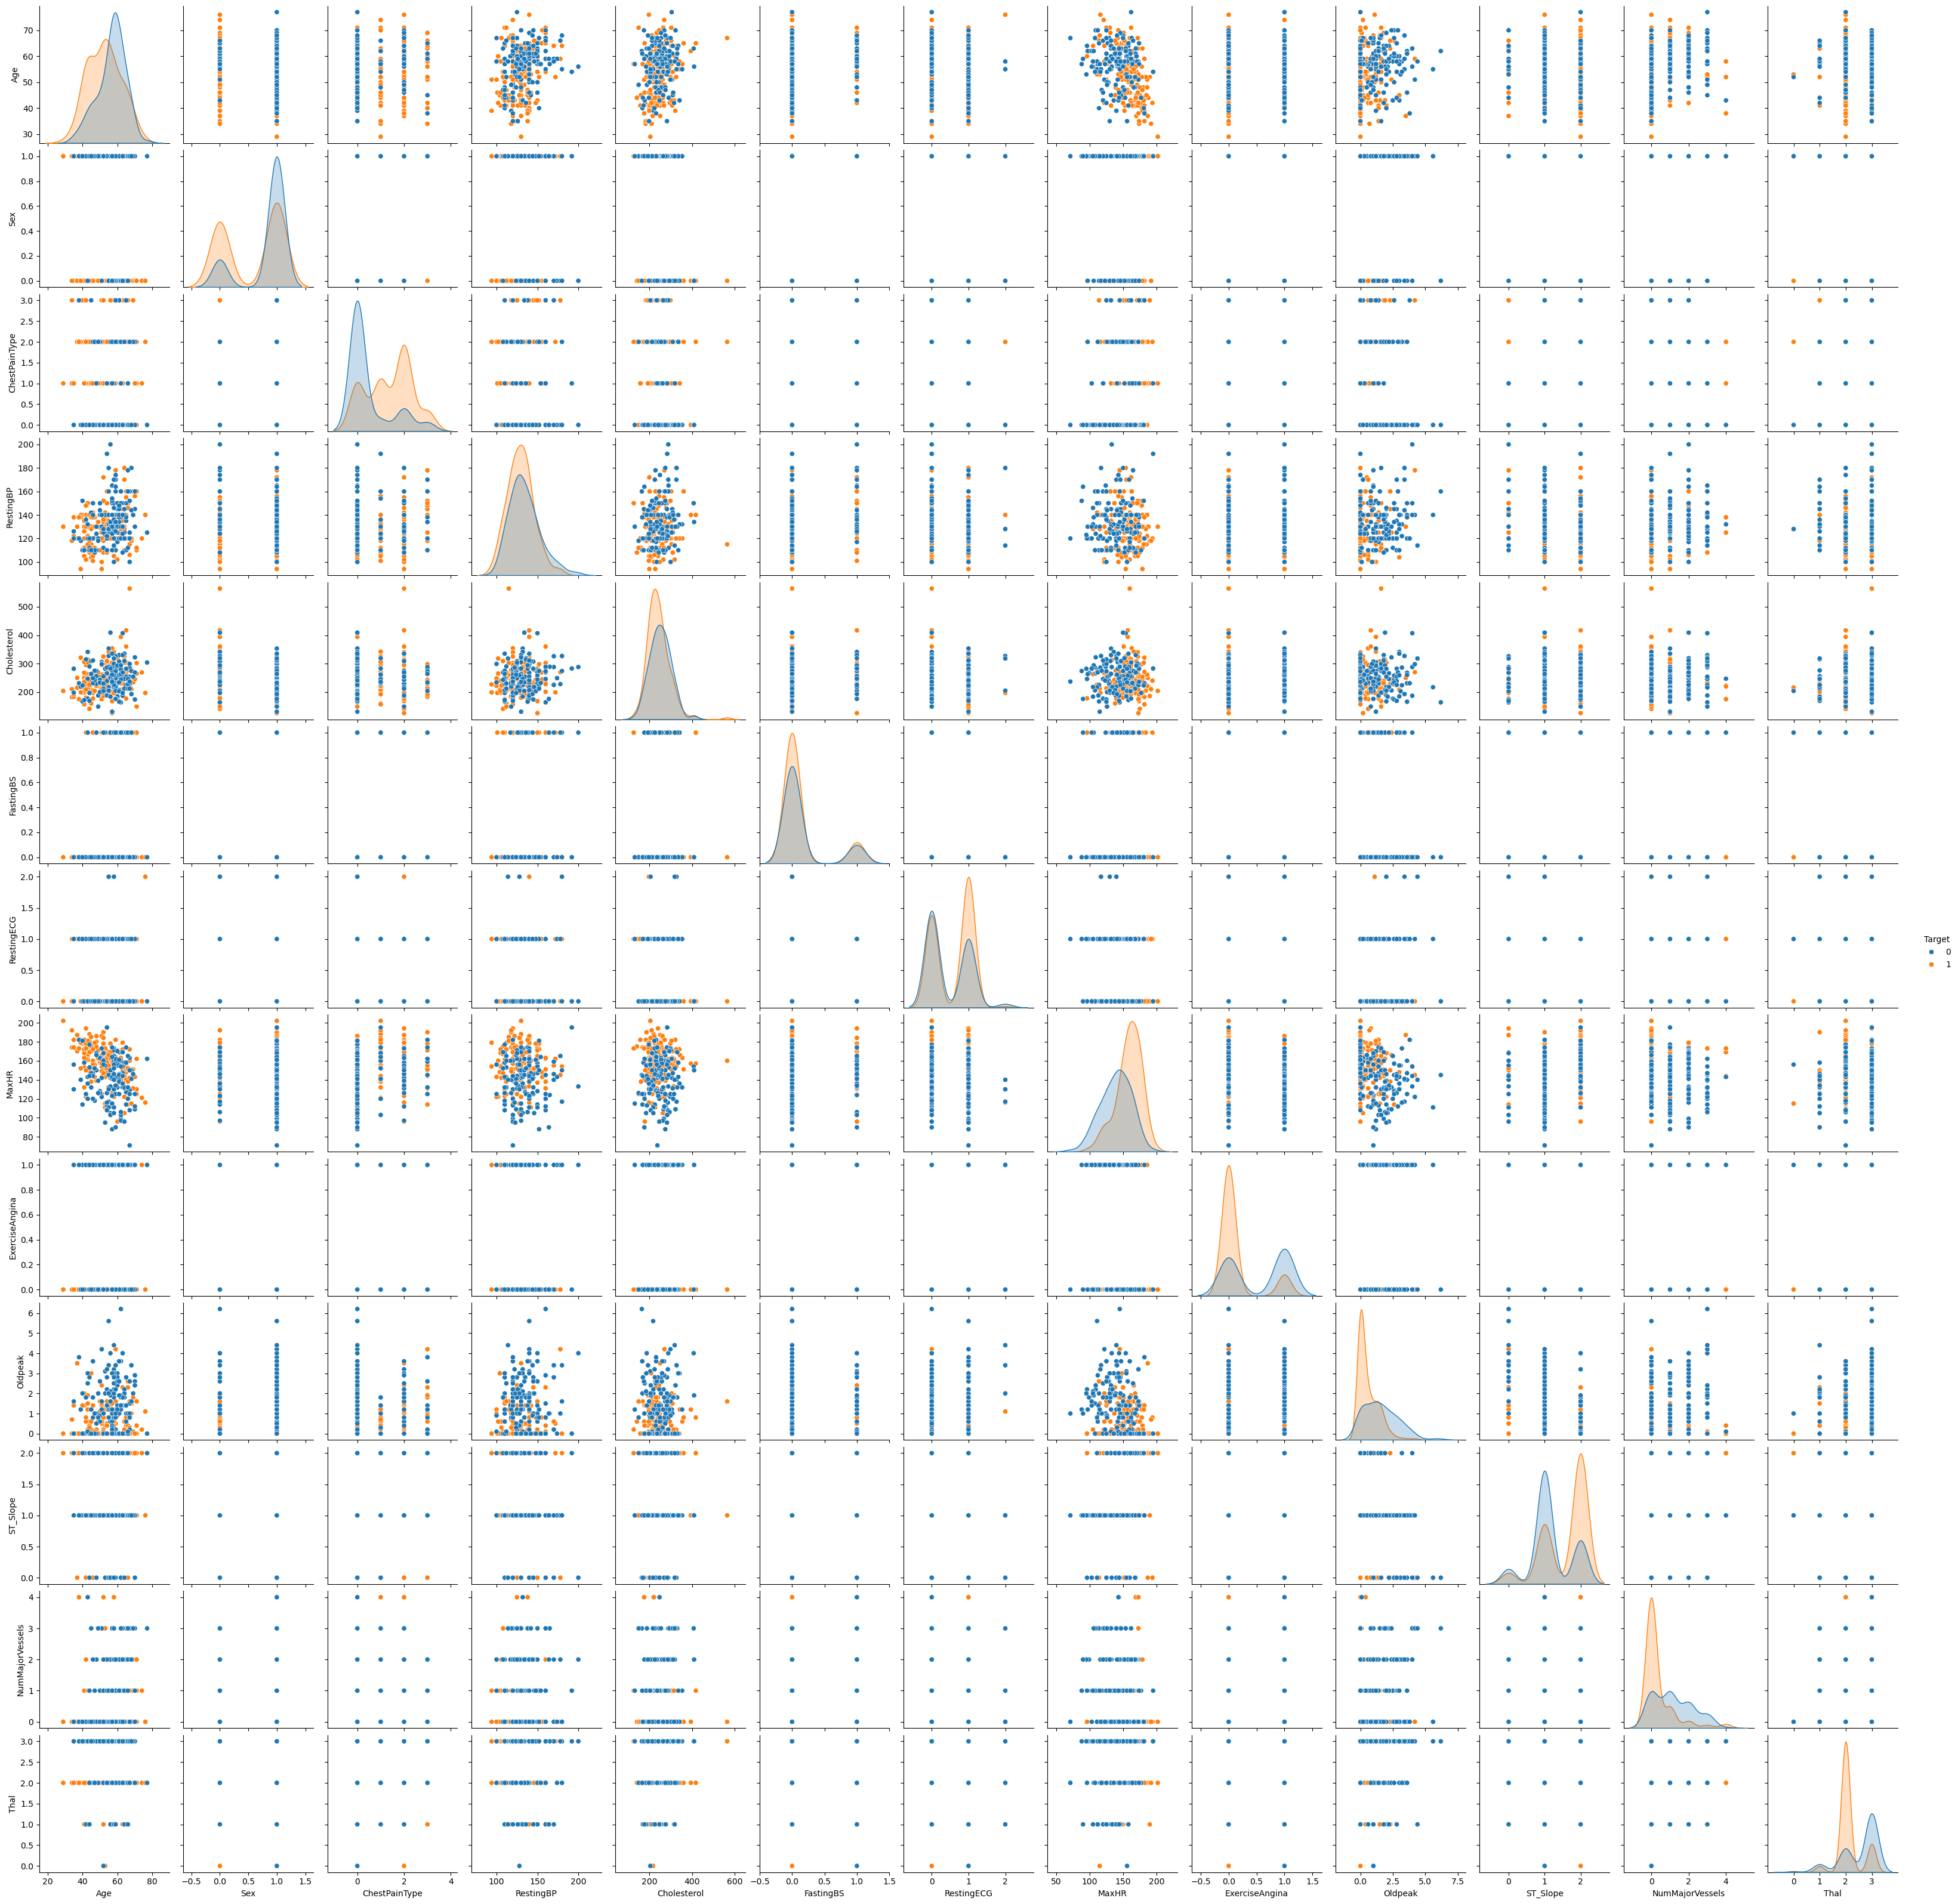

In [24]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Target')
plt.show()

##  <mark><span  style= "font-family: Times New Roman">Model traing and tuning</span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

In [25]:
# Declaring the feature and target variables
X = data.iloc[:,:-1] # Independent Variables
y = data.iloc[:,-1] # Dependent Variables

In [26]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Build the model
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [42]:
# Fit the model
history = classifier.fit(X_train , y_train , validation_data=(X_test, y_test), batch_size = 8 ,epochs = 100)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9831 - loss: 0.1010 - val_accuracy: 0.7582 - val_loss: 1.3132
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9918 - loss: 0.0672 - val_accuracy: 0.7582 - val_loss: 1.3182
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9931 - loss: 0.0554 - val_accuracy: 0.7582 - val_loss: 1.3330
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9703 - loss: 0.1104 - val_accuracy: 0.7582 - val_loss: 1.3475
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0506 - val_accuracy: 0.7582 - val_loss: 1.3479
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.0893 - val_accuracy: 0.7582 - val_loss: 1.3562
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0498 - val_accuracy: 0.7473 - val_loss: 1.3703
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0726 - val_accuracy: 0.7473 - 

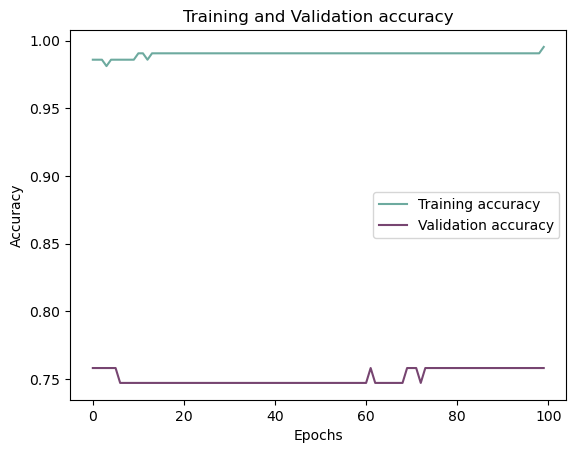

In [44]:
# Plotting model accuracy
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Validation accuracy turned out to be lower than training accuracy.

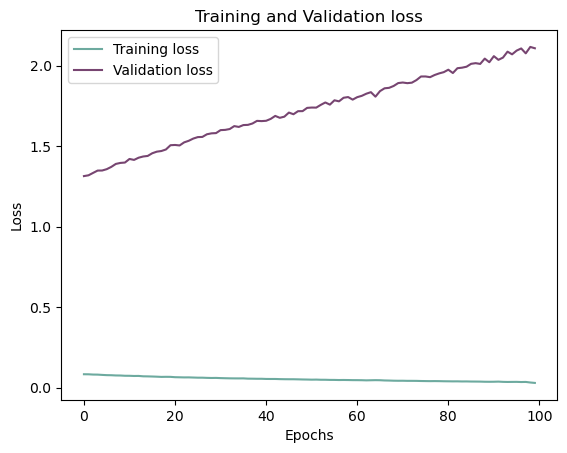

In [45]:
# Plotting model loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

Seems the validation loss is greater than the training loss which dropped the validation accuracy.

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

In [46]:
# Predicting and rescaling
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


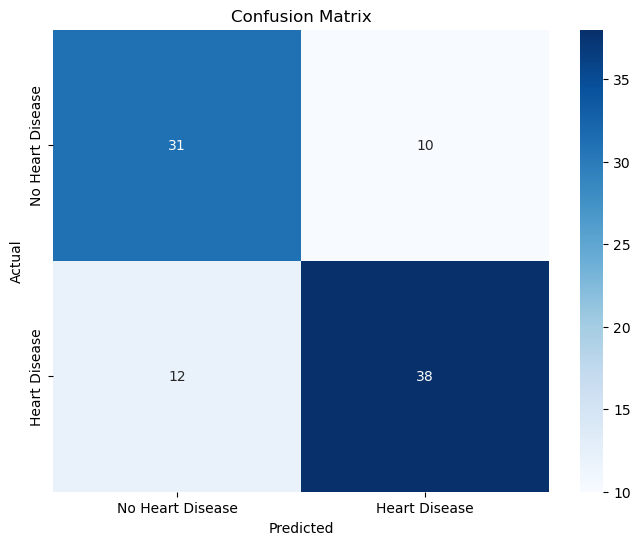

In [47]:
# Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Classsification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        41
           1       0.79      0.76      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [53]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.7582417582417582

- The accuracy came out to be 76% approximately.
- We can enhance the accuracy of our model by adjusting dense layers and dropout layers of our model while building it.